In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.fft import fft, fftfreq
import matplotlib.patches as mpatches
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord
import io
from google.colab import files

Slope (m): 3.128 ± 0.035, Intercept (b): 3.053 ± 0.209
Reduced chi-squared/Goodness of fit: 0.554 


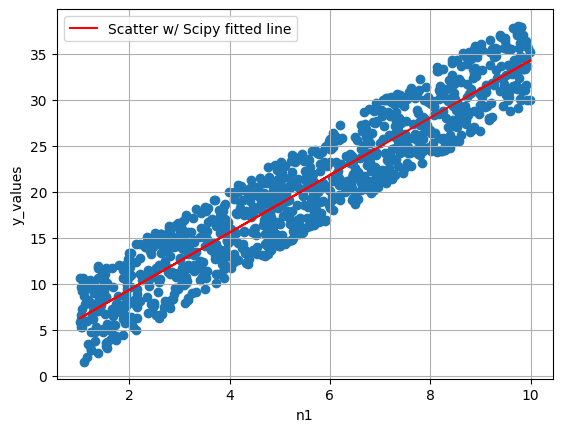

In [ ]:
# Random Array vs sum of Arrays ----------------------------------------------------------------------------------------------------------------------

#numbers = np.random.randint(1,10,size=1000)
n1 = np.random.uniform(1.0,10.0,size=1000) #inclusive of 1.0
#print(n1)

s1 = np.random.uniform(-1.5,1.5,size=1000)
#print(s1)

#y_values = n1+s1
#plt.scatter(n1, y_values, label = 'plot of n1 vs n1+s1',alpha=0.5)
#plt.xlabel('n1')
#plt.ylabel('n1+s1')
#plt.grid()
#plt.legend()
#plt.show()

# Task Three
y_values = 2.7 + 3.2*(n1+s1)
def linear_fit(x,m,b):
  return m*x + b

params,covariance = optimize.curve_fit(linear_fit,n1,y_values)
m,b=params
m_error,b_error = np.sqrt(np.diag(covariance))

res = y_values - linear_fit(n1,m,b)
chi_sq = np.sum((res**2)/y_values) #y_values = uncertainties
nu = len(y_values) - 2
reduced_chi_sq = chi_sq/nu

#display of original
plt.scatter(n1,y_values)
plt.plot(n1,linear_fit(n1,m,b), label='Scatter w/ Scipy fitted line',color='red')
plt.xlabel('n1')
plt.ylabel('y_values')
plt.legend()
plt.grid()
print(f"Slope (m): {m:.3f} ± {m_error:.3f}, Intercept (b): {b:.3f} ± {b_error:.3f}")
print(f"Reduced chi-squared/Goodness of fit: {reduced_chi_sq:.3f} ")
plt.show()

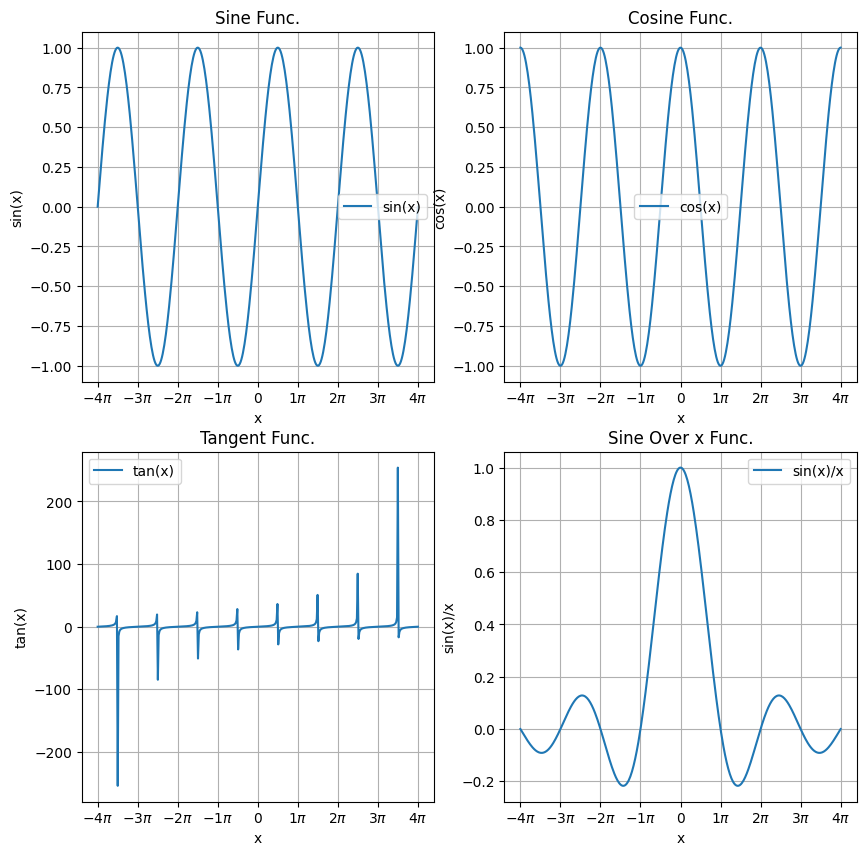

In [ ]:
# Trigonometric Functions ---------------------------------------------------------------------------------------------------------------------------

#new figure
x = np.linspace(-4*np.pi,4*np.pi,400)
plt.figure(figsize=(10,10))

#pi ticks
ticks = [-4*np.pi, -3*np.pi, -2*np.pi, -1*np.pi, 0, 1*np.pi, 2*np.pi, 3*np.pi, 4*np.pi]
labels = [r'$-4\pi$',r'$-3\pi$',r'$-2\pi$',r'$-1\pi$',r'$0$',r'$1\pi$',r'$2\pi$',r'$3\pi$',r'$4\pi$',] #using laTex formatting

#sin(x)
plt.subplot(2,2,1)
plt.plot(x,np.sin(x),label='sin(x)')
plt.title('Sine Func.')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid()
plt.legend()
plt.xticks(ticks,labels)

#cos(x)
plt.subplot(2,2,2)
plt.plot(x,np.cos(x),label='cos(x)')
plt.title('Cosine Func.')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.grid()
plt.legend()
plt.xticks(ticks,labels)

#tan(x)
plt.subplot(2,2,3)
plt.plot(x,np.tan(x),label='tan(x)')
plt.title('Tangent Func.')
plt.xlabel('x')
plt.ylabel('tan(x)')
plt.grid()
plt.legend()
plt.xticks(ticks,labels)

#sin(x)/x
plt.subplot(2,2,4)
plt.plot(x,np.sin(x)/x,label='sin(x)/x')
plt.title('Sine Over x Func.')
plt.xlabel('x')
plt.ylabel('sin(x)/x')
plt.grid()
plt.legend()
plt.xticks(ticks,labels)

plt.show()

In [ ]:
# Signals and Fourier Transforms ------------------------------------------------------------------------------------------------------------------
a = 2
s = 1000
d = 2
t = np.linspace(0, d,s,endpoint=False)
f = 3
ss = s/d
freq = fftfreq(s,d/s)[:s//2]

x1 = a * np.sin(2*np.pi*f*t + 0.15*np.pi)
ft1 = fft(x1)

n1 = np.random.uniform(-0.5,0.5,size=s)
x2 = x1 + n1
ft2 = fft(x2)

x3 = x2 + 0.99 * np.sin(2*np.pi*8*t + 0.35*np.pi)
ft3 = fft(x3)

x4 = x2 + 0.6*t**(0.5)
ft4 = fft(x4)

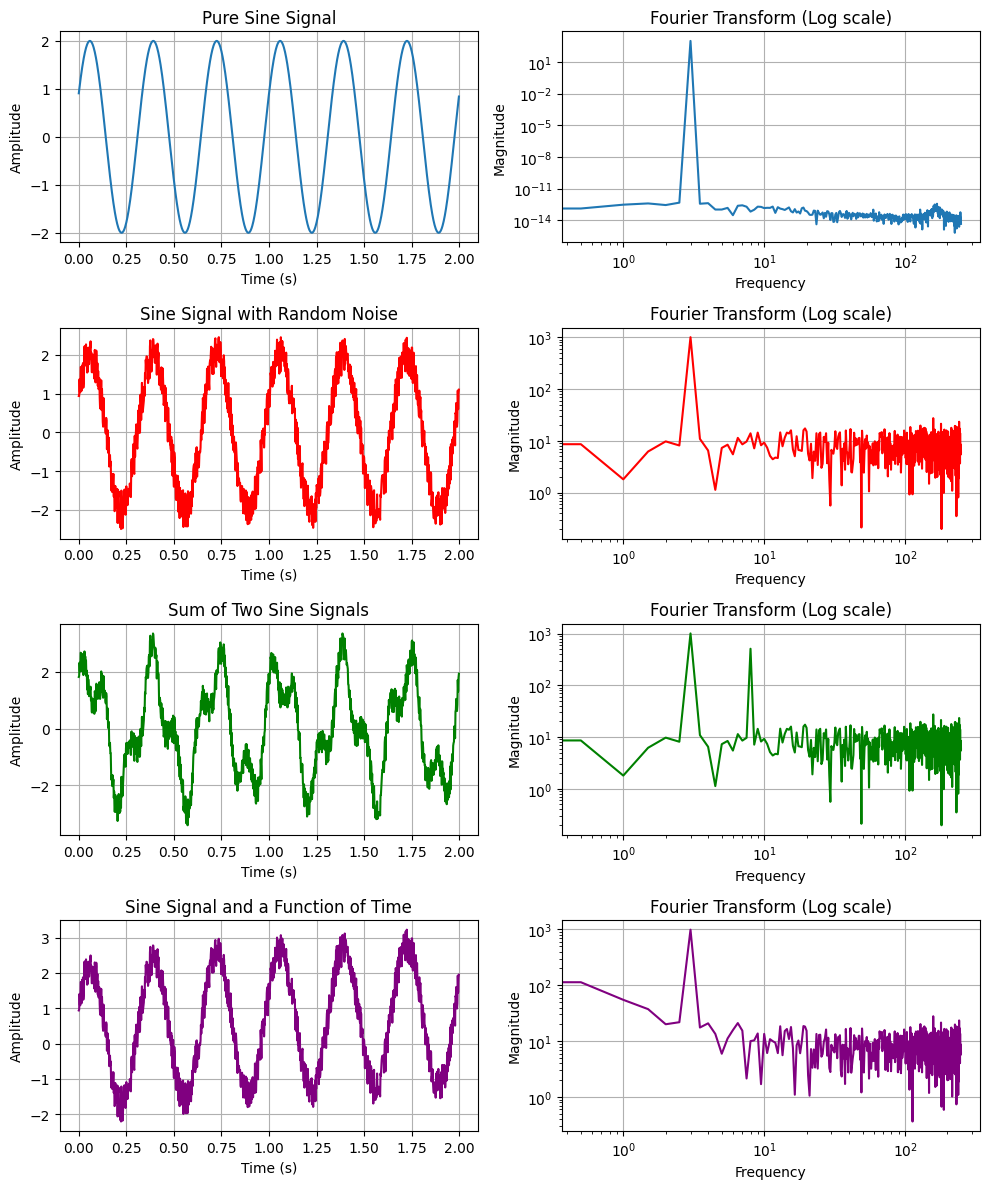

In [ ]:
plt.figure(figsize=(10, 12))

#row 1
plt.subplot(4,2,1)
plt.plot(t, x1)
plt.title('Pure Sine Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(4,2,2)
plt.plot(freq, np.abs(ft1[0:s//2]))
plt.loglog()
plt.title('Fourier Transform (Log scale)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

#row 2
plt.subplot(4,2,3)
plt.plot(t, x2, color='red')
plt.title('Sine Signal with Random Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(4,2,4)
plt.plot(freq, np.abs(ft2[0:s//2]),color='red')
plt.loglog()
plt.title('Fourier Transform (Log scale)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

#row 3

plt.subplot(4,2,5)
plt.plot(t, x3, color='green')
plt.title('Sum of Two Sine Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(4,2,6)
plt.plot(freq, np.abs(ft3[0:s//2]), color='green')
plt.loglog()
plt.title('Fourier Transform (Log scale)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

#row 4
plt.subplot(4,2,7)
plt.plot(t, x4, color='purple')
plt.title('Sine Signal and a Function of Time')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(4,2,8)
plt.plot(freq, np.abs(ft4[0:s//2]), color='purple')
plt.loglog()
plt.title('Fourier Transform (Log scale)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Astronomical Coordinate Systems ---------------------------------------------------------------------------------------------------------------------

from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic
import astropy.units as u

gc1 = SkyCoord(l=359.944866*u.deg, b=-0.043915*u.deg, frame='galactic')
gc2 = gc1.transform_to('icrs')
print(f"Galactic Centre in J2000: ({gc2.ra.deg}º,{gc2.dec.deg}º)\n")

c1 = SkyCoord(l=184.554646*u.deg, b= -5.783342*u.deg, frame='galactic')
c2 = c1.transform_to('icrs')
print(f"Crab in J2000: ({c2.ra.deg}º,{c2.dec.deg}º)\n")

m31= SkyCoord(l=121.174319*u.deg, b=-21.573310*u.deg, frame='galactic')
m32= m31.transform_to('icrs')
print(f"M31 in J2000: ({m32.ra.deg}º,{m32.dec.deg}º)\n")

m81= SkyCoord(l=283.7777365*u.deg, b=74.49115*u.deg, frame='galactic')
m82= m81.transform_to('icrs')
print(f"M87 in J2000: ({m82.ra.deg}º,{m82.dec.deg}º)\n")

t1= SkyCoord(l=170.644069*u.deg, b=83.361126*u.deg, frame='galactic')
t2= t1.transform_to('icrs')
print(f"TON-618 in J2000: ({t2.ra.deg}º,{t2.dec.deg}º)\n")

i1= SkyCoord(l=349.524794*u.deg, b=2.212662*u.deg, frame='galactic')
i2= i1.transform_to('icrs')
print(f"IGR J17091 -3624 in J2000: ({i2.ra.deg}º,{i2.dec.deg}º)\n")

s1= SkyCoord(l=359.944227*u.deg, b=-0.046157*u.deg, frame='galactic')
s2= s1.transform_to('icrs')
print(f"Sgr A* in J2000: ({s2.ra.deg}º,{s2.dec.deg}º)\n")

ss1= SkyCoord(l=11.315843*u.deg, b=-8.532834*u.deg, frame='galactic')
ss2= ss1.transform_to('icrs')
print(f"The Sun in J2000: ({ss2.ra.deg}º,{ss2.dec.deg}º)\n")

p1= SkyCoord(l=123.280543*u.deg, b=26.461395*u.deg, frame='galactic')
p2= p1.transform_to('icrs')
print(f"Polaris in J2000: ({p2.ra.deg}º,{p2.dec.deg}º)\n")

d1= SkyCoord(l=84.284728*u.deg, b=1.997547*u.deg, frame='galactic')
d2= d1.transform_to('icrs')
print(f"Deneb in J2000: ({d2.ra.deg}º,{d2.dec.deg}º)\n")

b1= SkyCoord(l=199.787228*u.deg, b=-8.958606*u.deg, frame='galactic')
b2= b1.transform_to('icrs')
print(f"Betelgeuse in J2000: ({b2.ra.deg}º,{b2.dec.deg}º)\n")

a1= SkyCoord(l=227.230283*u.deg, b=-8.890284*u.deg, frame='galactic')
a2= a1.transform_to('icrs')
print(f"Sirius A in J2000: ({a2.ra.deg}º,{a2.dec.deg}º)\n")

al1= SkyCoord(l=180.971903*u.deg, b=-20.248300*u.deg, frame='galactic')
al2= al1.transform_to('icrs')
print(f"Aldebaran in J2000: ({al2.ra.deg}º,{al2.dec.deg}º)\n")

ps1= SkyCoord(l=184.557476*u.deg, b=-5.784342*u.deg, frame='galactic')
ps2= ps1.transform_to('icrs')
print(f"PSR B0531+21 in J2000: ({ps2.ra.deg}º,{ps2.dec.deg}º)\n")

g1= SkyCoord(l=45.365776*u.deg, b=-0.219096*u.deg, frame='galactic')
g2= g1.transform_to('icrs')
print(f"GRS 1915+105 in J2000: ({g2.ra.deg}º,{g2.dec.deg}º)\n")

c21= SkyCoord(l=22.468269*u.deg, b=80.988266*u.deg, frame='galactic')
c22= c21.transform_to('icrs')
print(f"3C287 in J2000: ({c22.ra.deg}º,{c22.dec.deg}º)\n")

pg1= SkyCoord(l=21.908915*u.deg, b=43.964163*u.deg, frame='galactic')
pg2= pg1.transform_to('icrs')
print(f"PG1553 in J2000: ({pg2.ra.deg}º,{pg2.dec.deg}º)\n")

sa1= SkyCoord(l=158.583260*u.deg, b=-42.964483*u.deg, frame='galactic')
sa2= sa1.transform_to('icrs')
print(f"Saturn in J2000: ({sa2.ra.deg}º,{sa2.dec.deg}º)\n")

j1= SkyCoord(l=141.072562*u.deg, b=-52.729991*u.deg, frame='galactic')
j2= j1.transform_to('icrs')
print(f"Jupiter in J2000: ({j2.ra.deg}º,{j2.dec.deg}º)\n")

m1= SkyCoord(l=359.527905*u.deg, b=60.463151*u.deg, frame='galactic')
m2= m1.transform_to('icrs')
print(f"The Moon in J2000: ({m2.ra.deg}º,{m2.dec.deg}º)\n")

Galactic Centre in J2000: (266.41500090416525º,-29.006117397765593º)

Crab in J2000: (83.6323924149328º,22.017406148499727º)

M31 in J2000: (10.68469594761883º,41.26874845941984º)

M87 in J2000: (187.70592455076059º,12.391120407623857º)

TON-618 in J2000: (187.10402234590612º,31.477120969591578º)

IGR J17091 -3624 in J2000: (257.2817006247013º,-36.407145484003436º)

Sgr A* in J2000: (266.41680850268665º,-29.007830810574873º)

The Sun in J2000: (280.7374932476193º,-23.071950710198546º)

Polaris in J2000: (37.95410721997145º,89.26411060038039º)

Deneb in J2000: (310.3579712302835º,45.28033252889643º)

Betelgeuse in J2000: (88.79293263579063º,7.407069743576996º)

Sirius A in J2000: (101.28714900057302º,-16.716109727228105º)

Aldebaran in J2000: (68.98015497130301º,16.509306511955728º)

PSR B0531+21 in J2000: (83.63310713939605º,22.014492642645756º)

GRS 1915+105 in J2000: (288.79814244139453º,10.945800844744838º)

3C287 in J2000: (202.65706418970353º,25.153050847633544º)

PG1553 in J2000:

In [ ]:
# Astronomical Time Systems ---------------------------------------------------------------------------------------------------------------------------

from astropy.time import Time
times = [51544.00000000, 54989.13541667, 60871.57013889, 60900.75000000]
t = Time(times, format='mjd', scale='utc')
print(t.isot)

['2000-01-01T00:00:00.000' '2009-06-07T03:15:00.000'
 '2025-07-15T13:41:00.000' '2025-08-13T18:00:00.000']


In [29]:
# plotting GALACTIC onto hammer projection (HASH database, true PNe)

import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
import numpy as np
import io
from google.colab import files


dtype = [('idPNMain', 'i4'),('PNG', 'U10'),('Name', 'U10'),('PNstat', 'U1'),('RAJ2000', 'U12'),('DECJ2000', 'U12'),('DRAJ2000', 'f8'),('DDECJ2000', 'f8'),('Glon', 'f8'),('Glat', 'f8'),('MajDiam', 'f8'),('mainClass', 'U1'),('subClass', 'U1')]
data1 = np.genfromtxt('all_true_galactic_PNe.csv', delimiter=',',dtype=dtype,names=True)

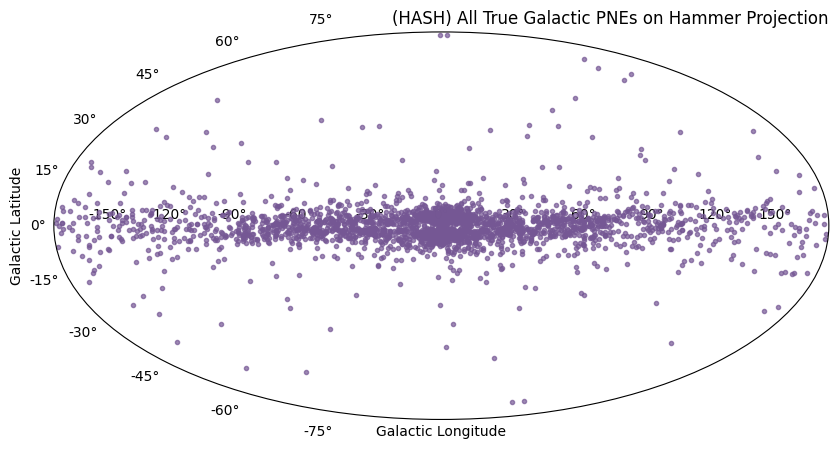

In [30]:
go1 = data1['Glon']
ga1 = data1['Glat']
glon1 = go1 * u.deg
glat1 = ga1 * u.deg

g_coords1 = SkyCoord(l=glon1,b=glat1, frame='galactic')
fig = plt.figure(figsize=(10,15))
a = fig.add_subplot(111,projection='hammer')
a.plot(g_coords1.l.wrap_at(180*u.deg).to(u.radian), g_coords1.b.to(u.radian),'o',markersize=3, alpha=0.7,color='#755794')
a.set_title("(HASH) All True Galactic PNEs on Hammer Projection",loc='right')
a.set_xlabel("Galactic Longitude")
a.set_ylabel("Galactic Latitude")
plt.show()

In [32]:
# plotting ALL (GALACTIC + NON-GALACTIC) onto hammer projection (HASH database, true PNe)
dtype = [('idPNMain', 'i4'),('PNG', 'U10'),('Name', 'U10'),('PNstat', 'U1'),('RAJ2000', 'U12'),('DECJ2000', 'U12'),('DRAJ2000', 'f8'),('DDECJ2000', 'f8'),('Glon', 'f8'),('Glat', 'f8'),('MajDiam', 'f8'),('mainClass', 'U1'),('subClass', 'U1')]
data2 = np.genfromtxt('all_true_all_PNe.csv', delimiter=',',dtype=dtype,names=True)

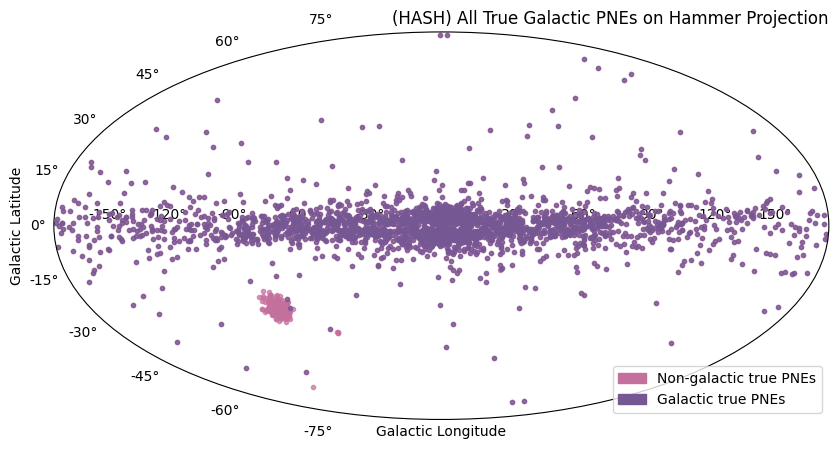

In [33]:
go1 = data1['Glon']
ga1 = data1['Glat']
glon1 = go1 * u.deg
glat1 = ga1 * u.deg

go2 = data2['Glon']
ga2 = data2['Glat']
glon2 = go2 * u.deg
glat2 = ga2 * u.deg

g_coords1 = SkyCoord(l=glon1,b=glat1, frame='galactic')

g_coords2 = SkyCoord(l=glon2,b=glat2, frame='galactic')

fig = plt.figure(figsize=(10,15))
a = fig.add_subplot(111,projection='hammer')
a.plot(g_coords2.l.wrap_at(180*u.deg).to(u.radian), g_coords2.b.to(u.radian),'o',markersize=3, alpha=0.7,color='#c4709c')
a.plot(g_coords1.l.wrap_at(180*u.deg).to(u.radian), g_coords1.b.to(u.radian),'o',markersize=3, alpha=0.7,color='#755794')

a.set_title("(HASH) All True Galactic PNEs on Hammer Projection",loc='right')
a.set_xlabel("Galactic Longitude")
a.set_ylabel("Galactic Latitude")
pink_patch = mpatches.Patch(color='#c4709c', label='Non-galactic true PNEs')
purple_patch = mpatches.Patch(color='#755794', label='Galactic true PNEs')
handles = [pink_patch,purple_patch]
plt.legend(handles=handles, loc='lower right')
plt.show()

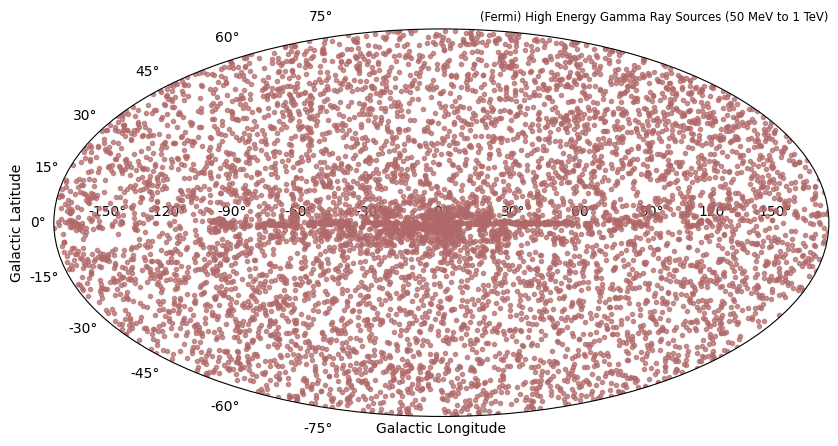

In [27]:
hdul = fits.open('gll_psc_v35.fit')
data = hdul[1].data
#print(data)

o3 = [row[4] for row in data]
a3 = [row[5] for row in data]

go3 = [float(value) for value in o3]
ga3 = [float(value) for value in a3]

glon3 = go3 * u.deg
glat3 = ga3 * u.deg

g_coords3 = SkyCoord(l=glon3,b=glat3, frame='galactic')

fig = plt.figure(figsize=(10,15))
a = fig.add_subplot(111,projection='hammer')
a.plot(g_coords3.l.wrap_at(180*u.deg).to(u.radian), g_coords3.b.to(u.radian),'o',markersize=3, alpha=0.7,color='#b06868')

a.set_title("(Fermi) High Energy Gamma Ray Sources (50 MeV to 1 TeV)",loc='right',size='small')
a.set_xlabel("Galactic Longitude")
a.set_ylabel("Galactic Latitude")
plt.show()

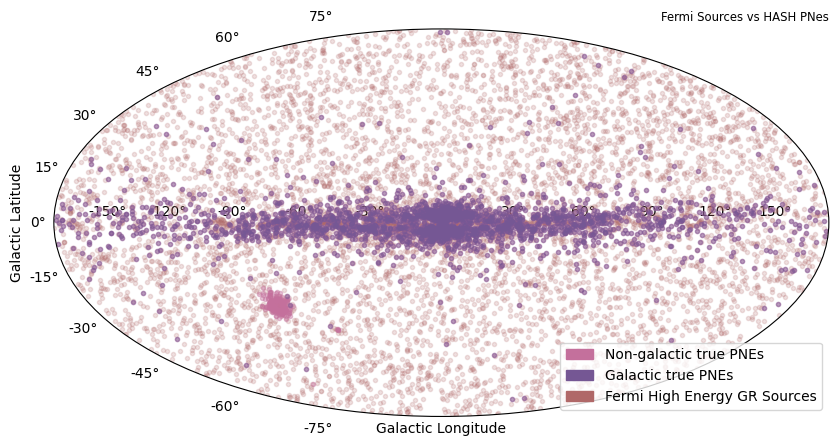

In [ ]:
hdul = fits.open('gll_psc_v35.fit')
data = hdul[1].data
#print(data)

o3 = [row[4] for row in data]
a3 = [row[5] for row in data]

go3 = [float(value) for value in o3]
ga3 = [float(value) for value in a3]

glon3 = go3 * u.deg
glat3 = ga3 * u.deg

g_coords3 = SkyCoord(l=glon3,b=glat3, frame='galactic')

fig = plt.figure(figsize=(10,15))
a = fig.add_subplot(111,projection='hammer')
a.plot(g_coords3.l.wrap_at(180*u.deg).to(u.radian), g_coords3.b.to(u.radian),'o',markersize=3, alpha=0.2,color='#b06868')
a.plot(g_coords2.l.wrap_at(180*u.deg).to(u.radian), g_coords2.b.to(u.radian),'o',markersize=3, alpha=0.4,color='#c4709c')
a.plot(g_coords1.l.wrap_at(180*u.deg).to(u.radian), g_coords1.b.to(u.radian),'o',markersize=3, alpha=0.4,color='#755794')

a.set_title("Fermi Sources vs HASH PNes",loc='right',size='small')
a.set_xlabel("Galactic Longitude")
a.set_ylabel("Galactic Latitude")
pink_patch = mpatches.Patch(color='#c4709c', label='Non-galactic true PNEs')
purple_patch = mpatches.Patch(color='#755794', label='Galactic true PNEs')
red_patch = mpatches.Patch(color='#b06868', label='Fermi High Energy GR Sources')
handles = [pink_patch,purple_patch, red_patch]
plt.legend(handles=handles, loc='lower right')
plt.show()

In [ ]:
distances = np.zeros((len(g_coords2), len(g_coords3)))
distances = g_coords2[:, None].separation(g_coords3[None, :]).deg
print(distances)

[[ 64.89784621  98.62253864 106.32682975 ...  72.10450497  77.46357588
  108.5740595 ]
 [ 61.92495006  95.37707494 103.85018898 ...  68.3081313   73.49911024
  106.4366324 ]
 [ 57.37175176  90.37515846  99.99879385 ...  62.39729672  67.33000174
  103.08663076]
 ...
 [ 95.77942249  73.34291187  71.5672551  ...  88.30653268  84.20018051
   71.18487426]
 [ 19.44887351  93.79052754 110.90819665 ...  38.28476435  50.36923681
  116.94000364]
 [ 51.58637712 129.16554364 145.21822828 ...  73.58917716  86.09050221
  150.57138976]]


In [ ]:
distances.shape

(3345, 7195)

In [ ]:
min_distances = {}

for col_index in range(distances.shape[1]):
    column = distances[:, col_index]
    min_row_index = np.argmin(column)
    min_distance = column[min_row_index]
    nearest_coord = g_coords2[min_row_index]
    min_distances[col_index] = (nearest_coord, min_distance)

for col_index, (coord, dist) in min_distances.items():
    print(f"PNe Coordinate: ({coord.l.value}º,{coord.b.value}º), Minimum Distance: {dist}º")

"""
for column in distances.T:
  min = column.min()
  list.append(min)
list = [float(value) for value in list]
print(list)
print(np.min(list))
"""

Streaming output truncated to the last 5000 lines.
PNe Coordinate: (219.13294º,31.2905º), Minimum Distance: 8.589684711213435º
PNe Coordinate: (224.39501º,15.31181º), Minimum Distance: 8.348487470736195º
PNe Coordinate: (260.15188º,0.2478º), Minimum Distance: 0.9546680864561878º
PNe Coordinate: (253.97101º,5.77763º), Minimum Distance: 0.8666967216439789º
PNe Coordinate: (208.55783º,33.28909º), Minimum Distance: 4.814329094589161º
PNe Coordinate: (285.79894º,-14.95174º), Minimum Distance: 2.3405528158814697º
PNe Coordinate: (250.686º,9.3476º), Minimum Distance: 0.8022318502376237º
PNe Coordinate: (256.95455º,3.64511º), Minimum Distance: 0.1307250004423524º
PNe Coordinate: (153.76998º,22.83219º), Minimum Distance: 14.638752846634306º
PNe Coordinate: (276.228º,-6.61198º), Minimum Distance: 4.786817946773837º
PNe Coordinate: (219.13294º,31.2905º), Minimum Distance: 6.69492600338307º
PNe Coordinate: (153.76998º,22.83219º), Minimum Distance: 13.683576574107306º
PNe Coordinate: (239.62866º,13

'\nfor column in distances.T:\n  min = column.min()\n  list.append(min)\nlist = [float(value) for value in list]\nprint(list)\nprint(np.min(list))\n'

In [ ]:
len(min_distances)

7195

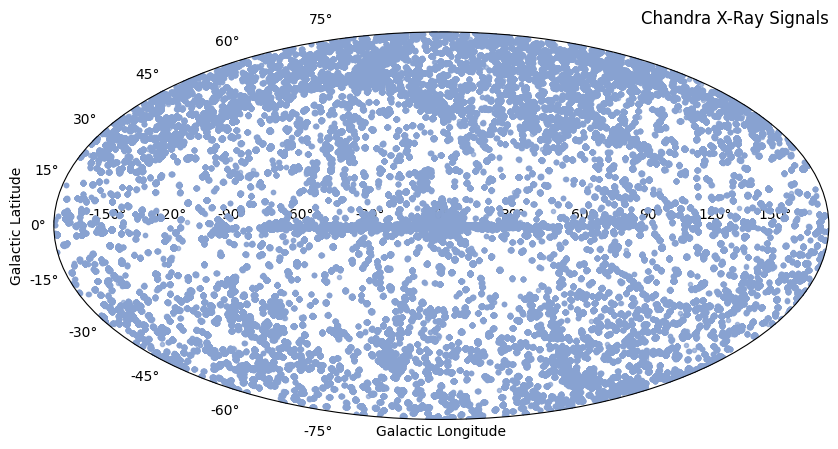

In [4]:
# chandra dataset - (x-ray)

dtypee = [('blank', 'f8'),('name', 'U20'), ('ra', 'U15'), ('dec', 'U15'), ('lii', 'f8'), ('bii', 'f8'), ('error_ellipse_r0', 'f8'), ('error_ellipse_r1', 'f8'), ('error_ellipse_angle', 'f8')]
data4 = np.genfromtxt('chandra.txt', delimiter='|', skip_header=3, dtype=dtypee, invalid_raise=False)
go4 = data4['lii']
ga4 = data4['bii']
glon4 = go4 * u.deg
glat4 = ga4 * u.deg

g_coords4 = SkyCoord(l=glon4,b=glat4, frame='galactic')

fig = plt.figure(figsize=(10,15))
a = fig.add_subplot(111,projection='hammer')
a.plot(g_coords4.l.wrap_at(180*u.deg).to(u.radian), g_coords4.b.to(u.radian),'o',markersize=3, alpha=0.7,color='#88a2d1')
a.set_title("Chandra X-Ray Signals",loc='right')
a.set_xlabel("Galactic Longitude")
a.set_ylabel("Galactic Latitude")
plt.show()

In [13]:
print(len(g_coords2)) # - 3345
print(len(g_coords4)) # = 407806
# so its (would be) a matrix of 3345 x 407,806, which is why its crashing - chandra is too crowded

dc = np.zeros((len(g_coords2), len(g_coords4)))
dc = g_coords2[:, None].separation(g_coords4[None, :]).deg
print(dc)

#crashes

407806
3345


'\ndc = np.zeros((len(g_coords2), len(g_coords4)))\ndc = g_coords2[:, None].separation(g_coords4[None, :]).deg\nprint(dc)\n'

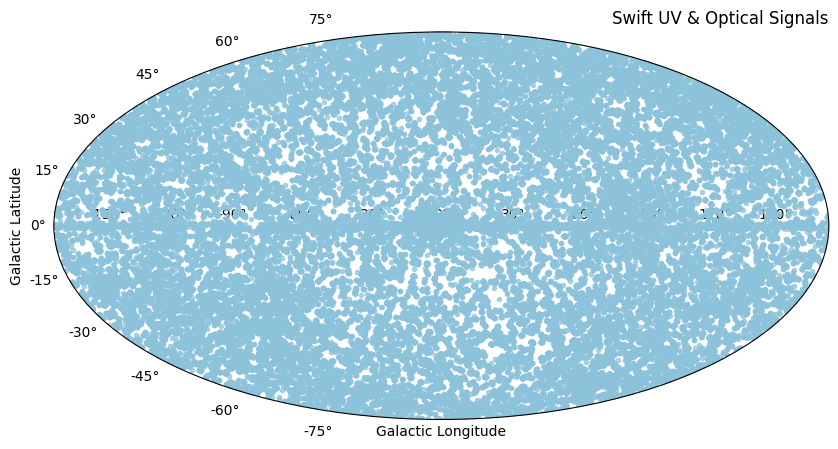

In [36]:
# swift dataset - (ultraviolet and optical)

dtypeee = [('blank', 'f8'),('source_number', 'i8'), ('name', 'U25'), ('ra', 'U15'), ('dec', 'U15'), ('lii', 'f8'), ('bii', 'f8'), ('error_radius', 'f8'), ('count_rate_fb', 'f8'), ('count_rate_fb_pos_err', 'f8'), ('count_rate_fb_neg_err', 'f8'), ('pow_flux_a', 'f8'), ('pow_flux_a_pos_err', 'f8'), ('pow_flux_a_neg_err', 'f8'), ('apec_flux_a', 'f8'), ('apec_flux_a_pos_err', 'f8'), ('apec_flux_a_neg_err', 'f8')]
data5 = np.genfromtxt('swift.txt', delimiter='|', skip_header=3, dtype=dtypeee, invalid_raise=False)

go5 = data5['lii']
ga5 = data5['bii']

glon5 = go5 * u.deg
glat5 = ga5 * u.deg

g_coords5 = SkyCoord(l=glon5,b=glat5, frame='galactic')

fig = plt.figure(figsize=(10,15))
a = fig.add_subplot(111,projection='hammer')
a.plot(g_coords5.l.wrap_at(180*u.deg).to(u.radian), g_coords5.b.to(u.radian),'o',markersize=3, alpha=0.7,color='#8dc2db')
a.set_title("Swift UV & Optical Signals",loc='right')
a.set_xlabel("Galactic Longitude")
a.set_ylabel("Galactic Latitude")
plt.show()

In [37]:
print(len(g_coords2)) # - 3345
print(len(g_coords5)) # = 206,335
# so its (would be) a matrix of 3345 x 206,335

ds = np.zeros((len(g_coords2), len(g_coords5)))
ds = g_coords2[:, None].separation(g_coords5[None, :]).deg
print(ds)

#both crashed

3345
206335


'\nds = np.zeros((len(g_coords2), len(less_gc5)))\nds = g_coords2[:, None].separation(less_gc5[None, :]).deg\nprint(ds)\n\n#both crashed\n'